In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx

In [3]:
from shared.constants import DatasetPath
from datasets.schema import DatasetSchema
from datasets.loading import load_igraph, igraph_to_nx

from datasets.visualization import plot_explore_dual_histogram, show_top_k_nodes, show_top_k_stacked_nodes

In [111]:
DATASET = DatasetPath('star-wars')
schema = DatasetSchema.load_schema(DATASET.name)
G = load_igraph(schema, unix_timestamp=True)

In [112]:
G.vs['gid'] = range(G.vcount())
G.es['gid'] = range(G.ecount())

In [113]:
if schema.is_node_temporal():
    timestamps = pd.Series(G.vs['timestamp'])
    G.vs['tstart'] = timestamps.fillna(np.NINF).values
    G.vs['tend'] = timestamps.fillna(np.PINF).values

if schema.is_edge_temporal():
    timestamps = pd.Series(G.es['timestamp'])
    G.es['tstart'] = timestamps.fillna(np.NINF)
    G.es['tend'] = timestamps.fillna(np.PINF)

In [114]:
timestamp_counts = None
if schema.is_node_temporal():
    counts = pd.Series(G.vs['tstart']).value_counts().add(pd.Series(G.vs['tend']).value_counts())
    timestamp_counts = counts if timestamp_counts is None else timestamp_counts.add(counts)
elif schema.is_edge_temporal():
    counts = pd.Series(G.es['tstart']).value_counts().add(pd.Series(G.es['tend']).value_counts())
    timestamp_counts = counts if timestamp_counts is None else timestamp_counts.add(counts)

if np.NINF in timestamp_counts.index:
    timestamp_counts.drop(np.NINF, inplace=True)
if np.PINF in timestamp_counts.index:
    timestamp_counts.drop(np.PINF, inplace=True)

<AxesSubplot:>

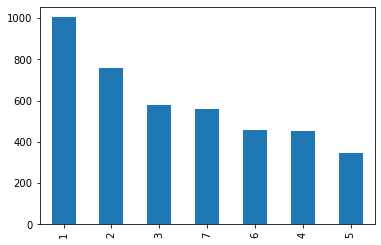

In [115]:
timestamp_counts.plot.bar()

In [116]:
N_SNAPSHOTS = 7

In [117]:
timestamp_min = timestamp_counts.index.min()
timestamp_max = timestamp_counts.index.max()

In [118]:
snapshot_ranges = list(zip(
    np.linspace(timestamp_min, timestamp_max, N_SNAPSHOTS + 1)[:-1],
    np.linspace(timestamp_min, timestamp_max, N_SNAPSHOTS + 1)[1:]
))
snapshot_ranges

[(1.0, 1.8571428571428572),
 (1.8571428571428572, 2.7142857142857144),
 (2.7142857142857144, 3.571428571428571),
 (3.571428571428571, 4.428571428571429),
 (4.428571428571429, 5.285714285714286),
 (5.285714285714286, 6.142857142857142),
 (6.142857142857142, 7.0)]

In [122]:
snapshot_i = 0
snapshot_start, snapshot_end = snapshot_ranges[snapshot_i]

In [123]:
nodes = G.vs.select(tstart_le=snapshot_end, tend_ge=snapshot_start) if schema.is_node_temporal() else G.vs
edges = G.es.select(tstart_le=snapshot_end, tend_ge=snapshot_start) if schema.is_edge_temporal() else G.es

In [126]:
G_snapshot = G.induced_subgraph(nodes).subgraph_edges(edges)

In [130]:
G_snapshot.get_edgelist()

[(1, 27),
 (12, 36),
 (12, 26),
 (10, 27),
 (6, 25),
 (12, 23),
 (7, 16),
 (3, 7),
 (3, 13),
 (7, 21),
 (3, 18),
 (5, 33),
 (3, 15),
 (10, 29),
 (10, 16),
 (9, 17),
 (9, 10),
 (6, 21),
 (12, 19),
 (3, 6),
 (2, 9),
 (6, 8),
 (5, 29),
 (3, 17),
 (10, 12),
 (12, 13),
 (18, 24),
 (9, 29),
 (12, 29),
 (17, 26),
 (22, 23),
 (5, 12),
 (8, 11),
 (10, 26),
 (5, 21),
 (28, 35),
 (2, 21),
 (1, 19),
 (10, 34),
 (3, 21),
 (3, 31),
 (1, 9),
 (9, 24),
 (9, 34),
 (9, 31),
 (18, 25),
 (9, 26),
 (21, 31),
 (10, 13),
 (12, 14),
 (16, 21),
 (15, 21),
 (12, 17),
 (12, 15),
 (15, 16),
 (8, 18),
 (5, 36),
 (12, 27),
 (2, 10),
 (2, 3),
 (12, 21),
 (2, 12),
 (10, 33),
 (10, 36),
 (1, 34),
 (3, 29),
 (6, 35),
 (10, 35),
 (10, 18),
 (17, 21),
 (22, 26),
 (9, 19),
 (0, 5),
 (0, 3),
 (10, 19),
 (1, 10),
 (10, 14),
 (21, 25),
 (11, 18),
 (6, 17),
 (9, 12),
 (5, 10),
 (9, 21),
 (10, 21),
 (4, 18),
 (6, 31),
 (10, 17),
 (6, 11),
 (21, 33),
 (0, 36),
 (10, 24),
 (14, 33),
 (12, 33),
 (1, 12),
 (19, 27),
 (17, 31),
 (1